In [1]:
import pandas as pd
import numpy as np
from pandas import ExcelFile
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
#get Data files and turn into DataFrames

nba_data_excel = "NBA_Data_2000.xlsx"
player_data_excel = "player_heightweight_data(cleanedinches).xlsm"

nba_data_df = pd.read_excel(nba_data_excel)
height_weight_df = pd.read_excel(player_data_excel)


In [3]:
#drop N/A values in year: nba_data_df
nba_data_df['Year'] = nba_data_df.Year.fillna(0)

#convert year into integer value
nba_data_df['Year'] = nba_data_df.Year.astype(int)

#Change 'Player' column to 'name'
nba_data_df = nba_data_df.rename(columns={"Player":"name"})

#Preview nba_data_df

nba_data_df.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2000,Tariq Abdul-Wahad,SG,25.0,TOT,61.0,56.0,1578.0,13.6,0.477,...,0.756,101.0,190.0,291.0,98.0,59.0,28.0,106.0,147.0,697.0
1,2000,Tariq Abdul-Wahad,SG,25.0,ORL,46.0,46.0,1205.0,14.4,0.484,...,0.762,77.0,162.0,239.0,72.0,53.0,16.0,87.0,116.0,563.0
2,2000,Tariq Abdul-Wahad,SG,25.0,DEN,15.0,10.0,373.0,10.8,0.448,...,0.738,24.0,28.0,52.0,26.0,6.0,12.0,19.0,31.0,134.0
3,2000,Shareef Abdur-Rahim,SF,23.0,VAN,82.0,82.0,3223.0,20.2,0.547,...,0.809,218.0,607.0,825.0,271.0,89.0,87.0,249.0,244.0,1663.0
4,2000,Cory Alexander,PG,26.0,DEN,29.0,2.0,329.0,8.8,0.381,...,0.773,8.0,34.0,42.0,58.0,24.0,2.0,28.0,39.0,82.0


In [4]:
#drop N/A values in year: nba_data_df
height_weight_df['weight'] = height_weight_df.weight.fillna(0)

#Convert weight into integer value: height_weight_df
height_weight_df['weight'] = height_weight_df.weight.astype(int)

#Preview
height_weight_df.head()

,name,position,weight,height (inches),height(feet)
0,Alaa Abdelnaby,F-C,240,82,6ft 10in
1,Zaid Abdul-Aziz,NaN,235,81,6ft 9in
2,Kareem Abdul-Jabbar,C,225,86,7ft 2in
3,Mahmoud Abdul-Rauf,G,162,73,6ft 1in
4,Tariq Abdul-Wahad,F,223,78,6ft 6in


In [5]:
#Merge Both DataFrames on: 'name' column

merged_df = pd.merge(nba_data_df, height_weight_df)
merged_df.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,AST,STL,BLK,TOV,PF,PTS,position,weight,height (inches),height(feet)
0,2000,Tariq Abdul-Wahad,SG,25.0,TOT,61.0,56.0,1578.0,13.6,0.477,...,98.0,59.0,28.0,106.0,147.0,697.0,F,223,78,6ft 6in
1,2000,Tariq Abdul-Wahad,SG,25.0,ORL,46.0,46.0,1205.0,14.4,0.484,...,72.0,53.0,16.0,87.0,116.0,563.0,F,223,78,6ft 6in
2,2000,Tariq Abdul-Wahad,SG,25.0,DEN,15.0,10.0,373.0,10.8,0.448,...,26.0,6.0,12.0,19.0,31.0,134.0,F,223,78,6ft 6in
3,2001,Tariq Abdul-Wahad,SG,26.0,DEN,29.0,12.0,420.0,5.8,0.438,...,22.0,14.0,13.0,34.0,54.0,111.0,F,223,78,6ft 6in
4,2002,Tariq Abdul-Wahad,SG,27.0,TOT,24.0,12.0,441.0,9.8,0.418,...,24.0,20.0,10.0,27.0,56.0,135.0,F,223,78,6ft 6in


In [6]:

#remove 'unnamed' and position columns

complete_df = merged_df.drop(["Pos"],axis=1)

#preview DataFrame: complete_df
complete_df.head()

,Year,name,Age,Tm,G,GS,MP,PER,TS%,3PAr,...,AST,STL,BLK,TOV,PF,PTS,position,weight,height (inches),height(feet)
0,2000,Tariq Abdul-Wahad,25.0,TOT,61.0,56.0,1578.0,13.6,0.477,0.036,...,98.0,59.0,28.0,106.0,147.0,697.0,F,223,78,6ft 6in
1,2000,Tariq Abdul-Wahad,25.0,ORL,46.0,46.0,1205.0,14.4,0.484,0.041,...,72.0,53.0,16.0,87.0,116.0,563.0,F,223,78,6ft 6in
2,2000,Tariq Abdul-Wahad,25.0,DEN,15.0,10.0,373.0,10.8,0.448,0.015,...,26.0,6.0,12.0,19.0,31.0,134.0,F,223,78,6ft 6in
3,2001,Tariq Abdul-Wahad,26.0,DEN,29.0,12.0,420.0,5.8,0.438,0.090,...,22.0,14.0,13.0,34.0,54.0,111.0,F,223,78,6ft 6in
4,2002,Tariq Abdul-Wahad,27.0,TOT,24.0,12.0,441.0,9.8,0.418,0.014,...,24.0,20.0,10.0,27.0,56.0,135.0,F,223,78,6ft 6in


In [7]:

#Filter Years to desired years: we want form 2000 to 2017

my_filter = complete_df.Year >= 1990
desired_years_df = complete_df[my_filter]

#Sort values by 'Years' column

desired_years_df = desired_years_df.sort_values(by=['Year'])

#Reset Index

desired_years_df = desired_years_df.reset_index()

#Delete 'index' column

desired_years_df = desired_years_df.drop(['index'], axis=1)

#preview DataFrame: desired_years_df

desired_years_df.head()

,Year,name,Age,Tm,G,GS,MP,PER,TS%,3PAr,...,AST,STL,BLK,TOV,PF,PTS,position,weight,height (inches),height(feet)
0,2000,Tariq Abdul-Wahad,25.0,TOT,61.0,56.0,1578.0,13.6,0.477,0.036,...,98.0,59.0,28.0,106.0,147.0,697.0,F,223,78,6ft 6in
1,2000,Chris Gatling,32.0,TOT,85.0,0.0,1811.0,17.3,0.525,0.087,...,71.0,82.0,23.0,169.0,246.0,1014.0,F-C,220,82,6ft 10in
2,2000,Chris Gatling,32.0,ORL,45.0,0.0,1041.0,17.4,0.525,0.050,...,40.0,48.0,10.0,105.0,142.0,598.0,F-C,220,82,6ft 10in
3,2000,Chris Gatling,32.0,DEN,40.0,0.0,770.0,17.1,0.525,0.138,...,31.0,34.0,13.0,64.0,104.0,416.0,F-C,220,82,6ft 10in
4,2000,Matt Geiger,30.0,PHI,65.0,20.0,1406.0,13.9,0.483,0.007,...,39.0,29.0,22.0,91.0,194.0,629.0,C,243,85,7ft 1in


In [8]:
desired_years_df.columns

Index(['Year', 'name', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'position', 'weight', 'height (inches)',
       'height(feet)'],
      dtype='object')

In [9]:
two_thousand = desired_years_df.loc[desired_years_df["Year"]==2000]

In [10]:
center = two_thousand.loc[two_thousand["position"]== "C"]
for_cent = two_thousand.loc[two_thousand["position"]== "F-C"]
forward = two_thousand.loc[two_thousand["position"]== "F"]

In [11]:
two_thousand_one = desired_years_df.loc[desired_years_df["Year"]==2001]

In [12]:
center_1 = two_thousand_one.loc[two_thousand_one["position"]== "C"]
for_cent_1 = two_thousand_one.loc[two_thousand_one["position"]== "F-C"]
forward_1 = two_thousand_one.loc[two_thousand_one["position"]== "F"]

In [13]:
two_thousand_two = desired_years_df.loc[desired_years_df["Year"]==2002]
center_2 = two_thousand_two.loc[two_thousand_two["position"]== "C"]
for_cent_2 = two_thousand_two.loc[two_thousand_two["position"]== "F-C"]
forward_2 = two_thousand_two.loc[two_thousand_two["position"]== "F"]

In [14]:
two_thousand_three = desired_years_df.loc[desired_years_df["Year"]==2003]
center_3 = two_thousand_three.loc[two_thousand_three["position"]== "C"]
for_cent_3 = two_thousand_three.loc[two_thousand_three["position"]== "F-C"]
forward_3 = two_thousand_three.loc[two_thousand_three["position"]== "F"]

In [15]:
two_thousand_four = desired_years_df.loc[desired_years_df["Year"]==2004]
center_4 = two_thousand_four.loc[two_thousand_four["position"]== "C"]
for_cent_4 = two_thousand_four.loc[two_thousand_four["position"]== "F-C"]
forward_4 = two_thousand_four.loc[two_thousand_four["position"]== "F"]

In [16]:
two_thousand_five = desired_years_df.loc[desired_years_df["Year"]==2005]
center_5 = two_thousand_five.loc[two_thousand_five["position"]== "C"]
for_cent_5 = two_thousand_five.loc[two_thousand_five["position"]== "F-C"]
forward_5 = two_thousand_five.loc[two_thousand_five["position"]== "F"]

In [17]:
two_thousand_six = desired_years_df.loc[desired_years_df["Year"]==2006]
center_6 = two_thousand_six.loc[two_thousand_six["position"]== "C"]
for_cent_6 = two_thousand_six.loc[two_thousand_six["position"]== "F-C"]
forward_6 = two_thousand_six.loc[two_thousand_six["position"]== "F"]

In [18]:
two_thousand_seven = desired_years_df.loc[desired_years_df["Year"]==2007]
center_7 = two_thousand_seven.loc[two_thousand_seven["position"]== "C"]
for_cent_7 = two_thousand_seven.loc[two_thousand_seven["position"]== "F-C"]
forward_7 = two_thousand_seven.loc[two_thousand_seven["position"]== "F"]

In [19]:
two_thousand_eight = desired_years_df.loc[desired_years_df["Year"]==2008]
center_8 = two_thousand_eight.loc[two_thousand_eight["position"]== "C"]
for_cent_8 = two_thousand_eight.loc[two_thousand_eight["position"]== "F-C"]
forward_8 = two_thousand_eight.loc[two_thousand_eight["position"]== "F"]

In [20]:
two_thousand_nine = desired_years_df.loc[desired_years_df["Year"]==2009]
center_9 = two_thousand_nine.loc[two_thousand_nine["position"]== "C"]
for_cent_9 = two_thousand_nine.loc[two_thousand_nine["position"]== "F-C"]
forward_9 = two_thousand_nine.loc[two_thousand_nine["position"]== "F"]

In [21]:
two_thousand_ten = desired_years_df.loc[desired_years_df["Year"]==2010]
center_10 = two_thousand_ten.loc[two_thousand_ten["position"]== "C"]
for_cent_10 = two_thousand_ten.loc[two_thousand_ten["position"]== "F-C"]
forward_10 = two_thousand_ten.loc[two_thousand_ten["position"]== "F"]

In [22]:
two_thousand_eleven = desired_years_df.loc[desired_years_df["Year"]==2011]
center_11 = two_thousand_eleven.loc[two_thousand_eleven["position"]== "C"]
for_cent_11 = two_thousand_eleven.loc[two_thousand_eleven["position"]== "F-C"]
forward_11 = two_thousand_eleven.loc[two_thousand_eleven["position"]== "F"]

In [23]:
two_thousand_twelve = desired_years_df.loc[desired_years_df["Year"]==2012]
center_12 = two_thousand_twelve.loc[two_thousand_twelve["position"]== "C"]
for_cent_12 = two_thousand_twelve.loc[two_thousand_twelve["position"]== "F-C"]
forward_12 = two_thousand_twelve.loc[two_thousand_twelve["position"]== "F"]

In [24]:
two_thousand_thirteen = desired_years_df.loc[desired_years_df["Year"]==2013]
center_13 = two_thousand_thirteen.loc[two_thousand_thirteen["position"]== "C"]
for_cent_13 = two_thousand_thirteen.loc[two_thousand_thirteen["position"]== "F-C"]
forward_13 = two_thousand_thirteen.loc[two_thousand_thirteen["position"]== "F"]

In [25]:
two_thousand_fourteen = desired_years_df.loc[desired_years_df["Year"]==2014]
center_14 = two_thousand_fourteen.loc[two_thousand_fourteen["position"]== "C"]
for_cent_14 = two_thousand_fourteen.loc[two_thousand_fourteen["position"]== "F-C"]
forward_14 = two_thousand_fourteen.loc[two_thousand_fourteen["position"]== "F"]

In [26]:
two_thousand_fifteen = desired_years_df.loc[desired_years_df["Year"]==2015]
center_15 = two_thousand_fifteen.loc[two_thousand_fifteen["position"]== "C"]
for_cent_15 = two_thousand_fifteen.loc[two_thousand_fifteen["position"]== "F-C"]
forward_15 = two_thousand_fifteen.loc[two_thousand_fifteen["position"]== "F"]

In [27]:
two_thousand_sixteen = desired_years_df.loc[desired_years_df["Year"]==2016]
center_16 = two_thousand_sixteen.loc[two_thousand_sixteen["position"]== "C"]
for_cent_16 = two_thousand_sixteen.loc[two_thousand_sixteen["position"]== "F-C"]
forward_16 = two_thousand_sixteen.loc[two_thousand_sixteen["position"]== "F"]

In [28]:
two_thousand_seventeen = desired_years_df.loc[desired_years_df["Year"]==2017]
center_17 = two_thousand_seventeen.loc[two_thousand_seventeen["position"]== "C"]
for_cent_17 = two_thousand_seventeen.loc[two_thousand_seventeen["position"]== "F-C"]
forward_17 = two_thousand_seventeen.loc[two_thousand_seventeen["position"]== "F"]

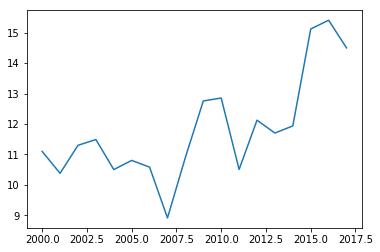

In [29]:
x= [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
y = [center["PER"].mean(),center_1["PER"].mean(),center_2["PER"].mean(), center_3["PER"].mean(), center_4["PER"].mean(), 
center_5["PER"].mean(), center_6["PER"].mean(), center_7["PER"].mean(), center_8["PER"].mean(), center_9["PER"].mean(),
center_10["PER"].mean(), center_11["PER"].mean(), center_12["PER"].mean(), center_13["PER"].mean(), center_14["PER"].mean(),
center_15["PER"].mean(),center_16["PER"].mean(),center_17["PER"].mean()]
plt.savefig("Logan_Images/PER Plot.png")
plt.plot(x,y)

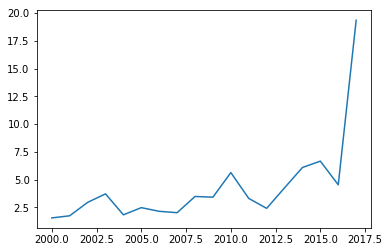

In [30]:
x= [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
y = [center["3PA"].mean(),center_1["3PA"].mean(),center_2["3PA"].mean(), center_3["3PA"].mean(), center_4["3PA"].mean(), 
center_5["3PA"].mean(), center_6["3PA"].mean(), center_7["3PA"].mean(), center_8["3PA"].mean(), center_9["3PA"].mean(),
center_10["3PA"].mean(), center_11["3PA"].mean(), center_12["3PA"].mean(), center_13["3PA"].mean(), center_14["3PA"].mean(),
center_15["3PA"].mean(),center_16["3PA"].mean(),center_17["3PA"].mean()]
plt.savefig("Logan_Images/3PA Plot.png")
plt.plot(x,y)

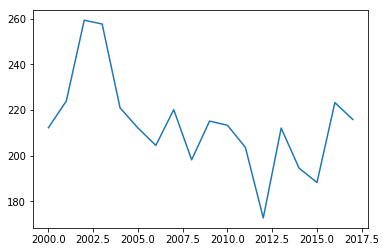

In [31]:
x= [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
y = [forward["TRB"].mean(),forward_1["TRB"].mean(),forward_2["TRB"].mean(), forward_3["TRB"].mean(), forward_4["TRB"].mean(), 
forward_5["TRB"].mean(), forward_6["TRB"].mean(), forward_7["TRB"].mean(), forward_8["TRB"].mean(), forward_9["TRB"].mean(),
forward_10["TRB"].mean(), forward_11["TRB"].mean(), forward_12["TRB"].mean(), forward_13["TRB"].mean(), forward_14["TRB"].mean(),
forward_15["TRB"].mean(),forward_16["TRB"].mean(),forward_17["TRB"].mean()]
plt.savefig("Logan_Images/Forward TRB Plot.png")
plt.plot(x,y)

<BarContainer object of 18 artists>

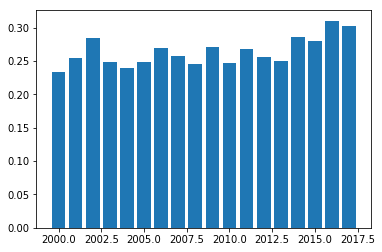

In [32]:
x= [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
y = [forward["3P%"].mean(),forward_1["3P%"].mean(),forward_2["3P%"].mean(), forward_3["3P%"].mean(), forward_4["3P%"].mean(), 
forward_5["3P%"].mean(), forward_6["3P%"].mean(), forward_7["3P%"].mean(), forward_8["3P%"].mean(), forward_9["3P%"].mean(),
forward_10["3P%"].mean(), forward_11["3P%"].mean(), forward_12["3P%"].mean(), forward_13["3P%"].mean(), forward_14["3P%"].mean(),
forward_15["3P%"].mean(),forward_16["3P%"].mean(),forward_17["3P%"].mean()]
plt.savefig("Logan_Images/Forward 3P% Plot.png")
plt.bar(x,y)

In [33]:
forward_17

,Year,name,Age,Tm,G,GS,MP,PER,TS%,3PAr,...,AST,STL,BLK,TOV,PF,PTS,position,weight,height (inches),height(feet)
9599,2017,Ersan Ilyasova,29.0,PHI,53.0,40.0,1447.0,15.4,0.553,0.460,...,97.0,33.0,14.0,78.0,133.0,786.0,F,235,82,6ft 10in
9602,2017,Ersan Ilyasova,29.0,TOT,82.0,52.0,2142.0,14.6,0.546,0.452,...,141.0,58.0,23.0,116.0,211.0,1071.0,F,235,82,6ft 10in
9604,2017,Matt Barnes,36.0,TOT,74.0,18.0,1777.0,10.3,0.514,0.556,...,194.0,48.0,26.0,107.0,185.0,527.0,F,226,79,6ft 7in
9605,2017,Ryan Kelly,25.0,ATL,16.0,0.0,110.0,7.8,0.408,0.357,...,8.0,4.0,5.0,4.0,5.0,25.0,F,230,83,6ft 11in
9606,2017,Jake Layman,22.0,POR,35.0,1.0,249.0,4.9,0.404,0.573,...,11.0,9.0,3.0,11.0,22.0,78.0,F,210,81,6ft 9in
9609,2017,Matt Barnes,36.0,SAC,54.0,13.0,1367.0,10.2,0.501,0.551,...,149.0,36.0,17.0,83.0,138.0,413.0,F,226,79,6ft 7in
9614,2017,Taurean Waller-Prince,22.0,ATL,59.0,10.0,981.0,9.8,0.513,0.358,...,55.0,43.0,27.0,61.0,96.0,335.0,F,220,80,6ft 8in
9617,2017,Otto Porter,23.0,WAS,80.0,80.0,2605.0,17.3,0.628,0.425,...,121.0,116.0,41.0,43.0,193.0,1075.0,F,198,80,6ft 8in
9619,2017,Jae Crowder,26.0,BOS,72.0,72.0,2335.0,14.9,0.613,0.547,...,155.0,72.0,23.0,79.0,161.0,999.0,F,235,78,6ft 6in
9621,2017,Brandon Bass,31.0,LAC,52.0,0.0,577.0,19.7,0.650,0.016,...,21.0,14.0,11.0,29.0,45.0,292.0,F,250,80,6ft 8in


In [36]:
#Drop N/A values in 'Pos' column
#desired_years_df["Pos"] = complete_df.Pos.dropna()

#Groupby year

grouped_df = desired_years_df.groupby(['Year','position'])
grouped_df.MP.mean().to_frame()
avg_weight = grouped_df['weight'].mean()

#avg_weight_df = avg_weight_df.rename(columns={"Year":"Year",
                                             #"position":"Position",
                                             #"weight":"Weight"})

In [37]:
avg_weight.reset_index()

,Year,position,weight
0,2000,C,250.792453
1,2000,C-F,231.250000
2,2000,F,228.033113
3,2000,F-C,231.851852
4,2000,F-G,213.428571
5,2000,G,187.929936
6,2000,G-F,205.902439
7,2001,C,252.260870
8,2001,C-F,234.000000
9,2001,F,227.705521


In [38]:
type(avg_weight)

pandas.core.series.Series

In [39]:
avg_weight_df = avg_weight.to_frame()

In [40]:
avg_weight_df

weight
Year position            
2000 C         250.792453
     C-F       231.250000
     F         228.033113
     F-C       231.851852
     F-G       213.428571
     G         187.929936
     G-F       205.902439
2001 C         252.260870
     C-F       234.000000
     F         227.705521
     F-C       232.560000
     F-G       209.894737
     G         188.916201
     G-F       205.225806
2002 C         252.493151
     C-F       239.375000
     F         229.820896
     F-C       235.680851
     F-G       214.105263
     G         190.176136
     G-F       210.548387
2003 C         249.825397
     C-F       241.125000
     F         233.103704
     F-C       238.039216
     F-G       218.000000
     G         192.228070
     G-F       211.000000
2004 C         251.569767
     C-F       230.818182
...                   ...
2013 G         195.909091
     G-F       215.250000
2014 C         257.636364
     C-F       249.090909
     F         229.966102
     F-C       249.000000
     F-G       217.739130
     G         195.220264
     G-F       212.416667
2015 C         256.000000
     C-F       247.346154
     F         230.208092
     F-C       244.779661
     F-G       214.500000
     G         193.672000
     G-F       213.000000
2016 C         255.551020
     C-F       248.800000
     F         231.902098
     F-C       246.078125
     F-G       220.000000
     G         193.709821
     G-F       215.400000
2017 C         257.285714
     C-F       246.421053
     F         229.642384
     F-C       243.723404
     F-G       216.812500
     G         194.769585
     G-F       213.533333

[126 rows x 1 columns]

In [41]:
type(avg_weight_df)

pandas.core.frame.DataFrame

In [42]:
avg_weight_df = avg_weight_df.reset_index()

In [43]:
avg_weight_df

,Year,position,weight
0,2000,C,250.792453
1,2000,C-F,231.250000
2,2000,F,228.033113
3,2000,F-C,231.851852
4,2000,F-G,213.428571
5,2000,G,187.929936
6,2000,G-F,205.902439
7,2001,C,252.260870
8,2001,C-F,234.000000
9,2001,F,227.705521


In [44]:
test = avg_weight_df.loc[avg_weight_df["position"]=="C"]

In [45]:
test

,Year,position,weight
0,2000,C,250.792453
7,2001,C,252.260870
14,2002,C,252.493151
21,2003,C,249.825397
28,2004,C,251.569767
35,2005,C,253.229730
42,2006,C,258.442857
49,2007,C,258.086207
56,2008,C,253.577465
63,2009,C,253.480519


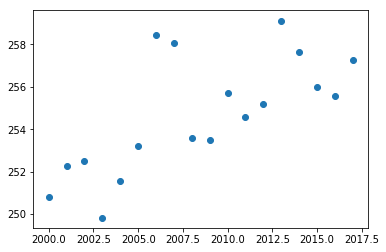

In [46]:
plt.scatter(test["Year"], test["weight"])

In [ ]:
new_df = desired_years_df.groupby(['Year','position'])
avg_height = new_df["height (inches)"].mean()
avg_height.reset_index()

In [ ]:
avg_height_df = avg_height.to_frame()

In [ ]:
logan = avg_height_df.reset_index()

In [ ]:
logan

In [ ]:
test2 = logan.loc[logan["position"]=="C"]

In [ ]:
test2

In [ ]:
plt.scatter(test["Year"], test["weight"], color = "red")
plt.scatter(test2["Year"], test2["height (inches)"], color = "blue")

In [ ]:
# While height has remained relatively constant, weight has increased. 

In [ ]:
#test to see weight increase significance
stats.ttest_ind(test2.height(inches), test.weight, equal_var=False)
#stats.ttest_ind(center_2.PER, center_1.PER, equal_var=False)